In [1]:
import pickle

import matplotlib.pyplot as plt
import torch

In [2]:
with open("instance.pickle", "rb") as file:
    instance = pickle.load(file)

In [3]:
(k, m, n, stdev) = (instance.k, instance.m, instance.n, instance.stdev)
(A, x0, noise, y) = (instance.A, instance.x0, instance.noise, instance.y)
Phi = instance.Phi

In [4]:
tau = 1 / stdev**2  # noise is known
xi = 1e4

In [5]:
mu = torch.zeros(n).cfloat()
Gamma = torch.eye(n).cfloat()
w = torch.ones(n)

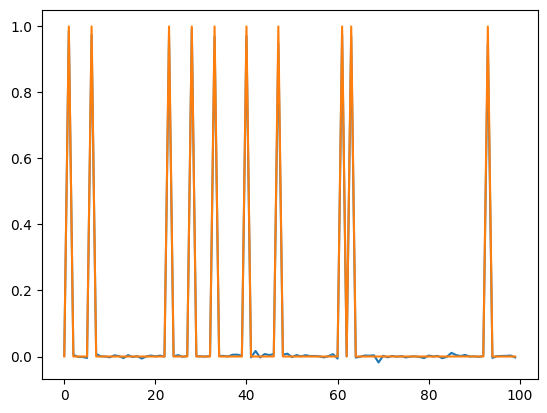

In [6]:
for _ in range(100):
    Winv = w.reciprocal().diag().cfloat()
    K = torch.eye(m)/tau + A @ Winv @ A.t().conj()
    Kinv = torch.linalg.inv(K)

    mu = A.t().conj() @ Kinv @ y / w

    Gamma_diag = w.reciprocal() - torch.sum((Kinv @ A / w) * A.conj() / w, dim=0)
    
    m2 = mu.abs().square() + Gamma_diag.real
    w = (xi / (m2 + 1e-9)).sqrt()

plt.plot(mu.real);
plt.plot(x0.real);

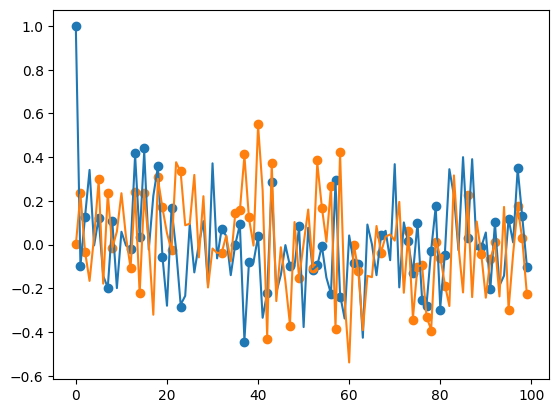

In [7]:
#plt.plot((Phi @ Gamma @ Phi.t().conj()).diag().real);
plt.plot((Phi @ mu).real);
plt.plot((Phi @ mu).imag);
plt.scatter(instance.ids, instance.y.real);
plt.scatter(instance.ids, instance.y.imag);

### Takeaways

1. Easy peasy, lemon squeezy.
2. Double-check this using an actual NUS NMR FID.